In [11]:
library(tidyverse)
library(ggplot2)
library(plyranges)
library(karyoploteR)
library(hrbrthemes)
library(ggpubr)
library(chromoMap)

## Reference bovine sequence

In [12]:
matrix_data = read.table("bos_taurus/wildtype/orca_predictions_16Mb.txt", sep = "\t")
mat = as.matrix(matrix_data)
colnames(mat) <- NULL

### Computing the insulation score

In [13]:
num = dim(mat)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(mat[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
data = tibble(i = seq_along(scores) + w, insulation=scores)

In [14]:
vmin=-1
plotmat = mat
plotmat[plotmat<vmin] = vmin

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvable dans la base de données de polices PostScript"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvable dans la base de données de polices PostScript"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvable dans la base de données de polices PostScript"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvable dans la base de données de polices PostScript"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvable dans la base de données de polices PostScript"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvab

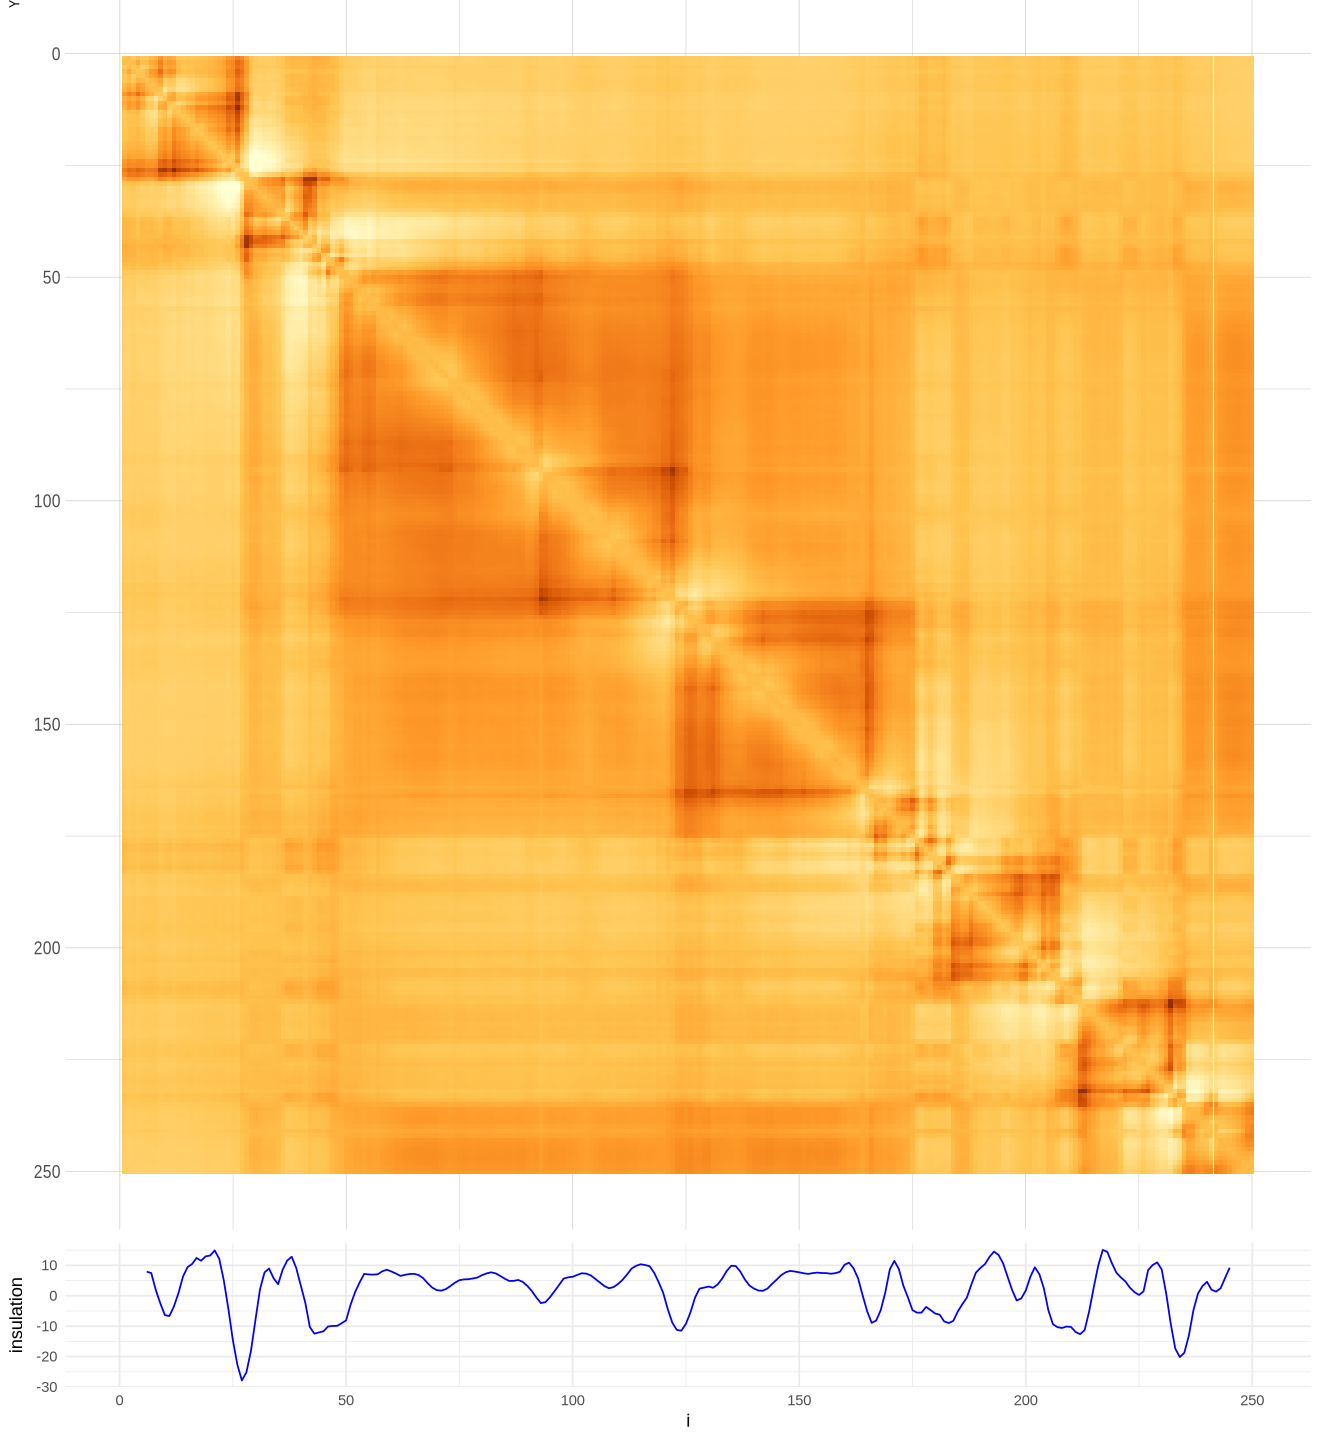

In [15]:
# Make plots wider 
#options(repr.plot.width=15, repr.plot.height=5)
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    theme_ipsum() +
    theme(legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))

p3 = data %>% ggplot(aes(x=i, y=insulation)) +
         geom_line(color="blue") +
         scale_x_continuous(expand = c(0.075, 0)) +
         theme_minimal()

ggarrange(p1, p3, heights = c(3, 0.5), nrow = 2, align = "v")

### Computing the PC1

In [34]:
cormat = cor(mat, method = "pearson")
eigen_result <- eigen(cormat)

eigenvalues <- eigen_result$values
eigenvectors <- eigen_result$vectors

PC1 = eigenvectors[,1]
compart = tibble(i = seq_along(PC1), pc1=PC1)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvable dans la base de données de polices PostScript"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvable dans la base de données de polices PostScript"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvable dans la base de données de polices PostScript"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvable dans la base de données de polices PostScript"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvable dans la base de données de polices PostScript"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police 'Arial Narrow' introuvab

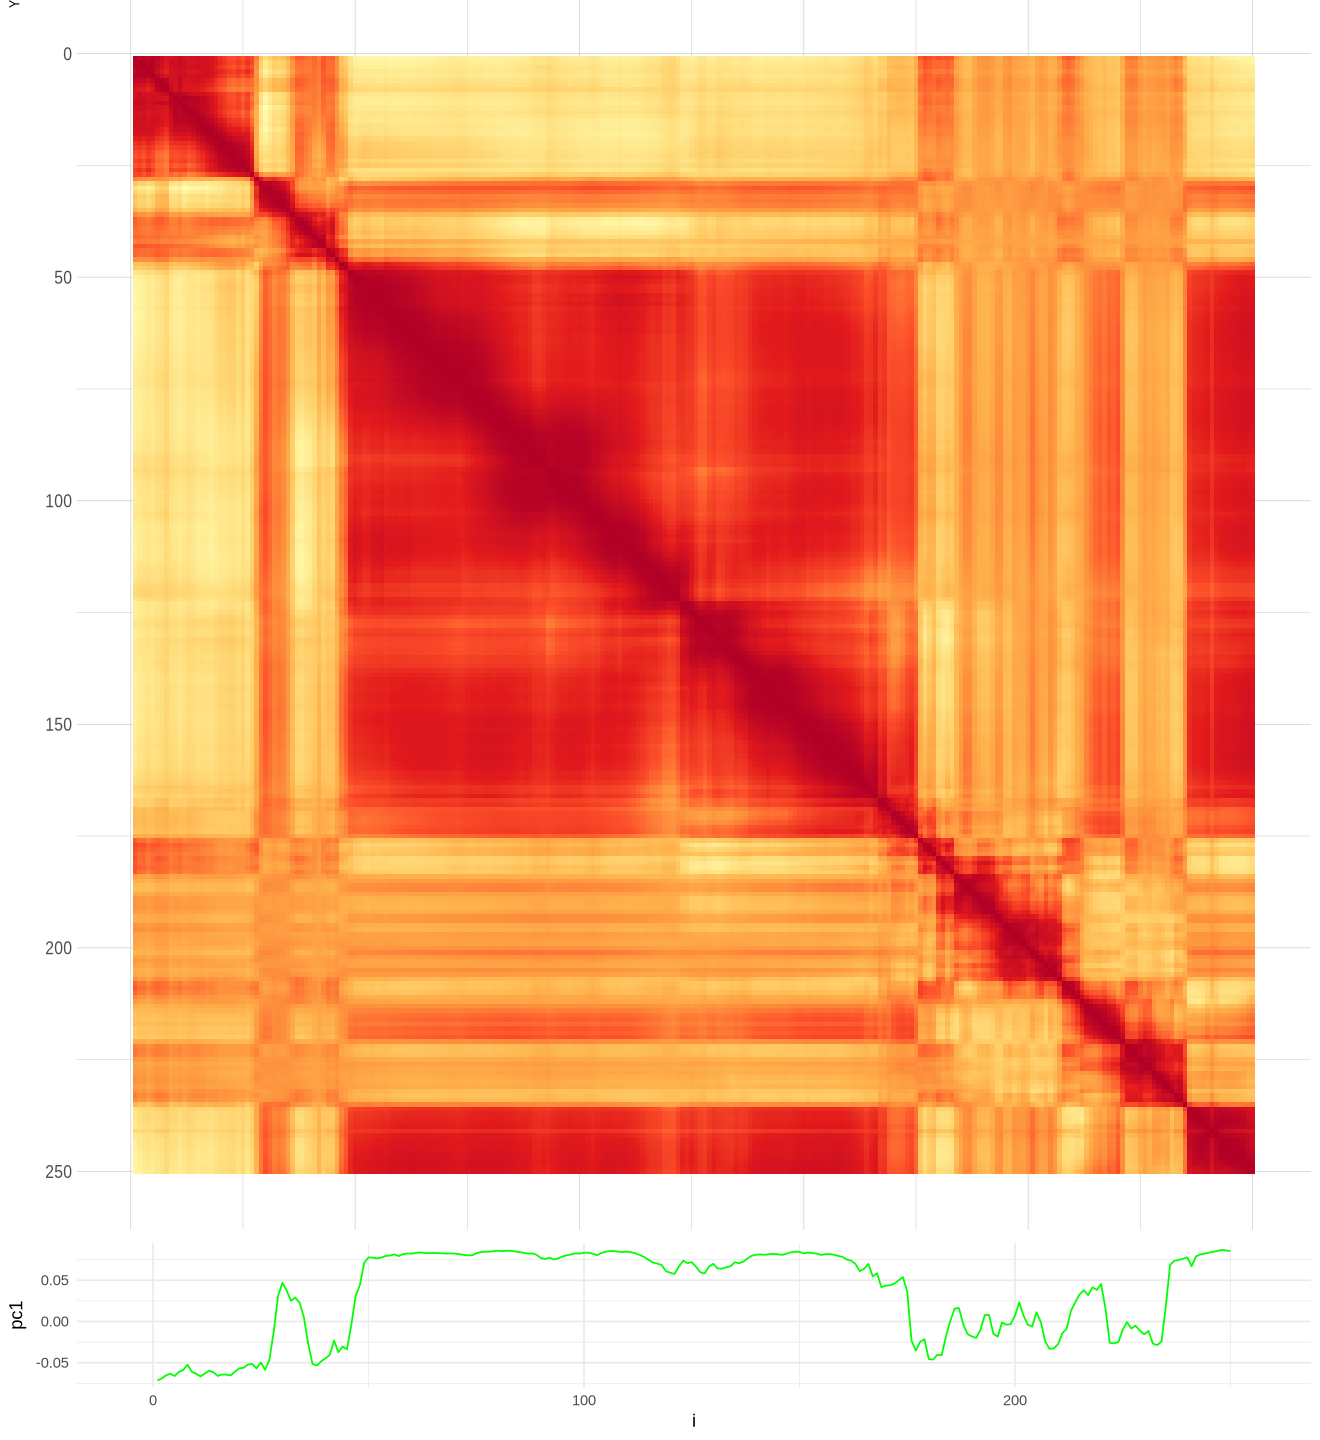

In [17]:
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = cormat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    scale_fill_distiller(palette = "YlOrRd", direction=1) +
    scale_y_reverse() +
    theme_ipsum() +
    theme(legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))

p2 = compart %>% ggplot(aes(x=i, y=pc1)) +
         geom_line(color="green") +
         scale_x_continuous(expand = c(0.075, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

## shuffled ctcf matrix

In [43]:
matrix_data = read.table("bos_taurus/ctcf/shuffle/q0.3/orca_predictions_16Mb.txt", sep = "\t")
mat = as.matrix(matrix_data)
colnames(mat) <- NULL

### Computing the insulation score

In [44]:
num = dim(mat)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(mat[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
data = tibble(i = seq_along(scores) + w, insulation=scores)

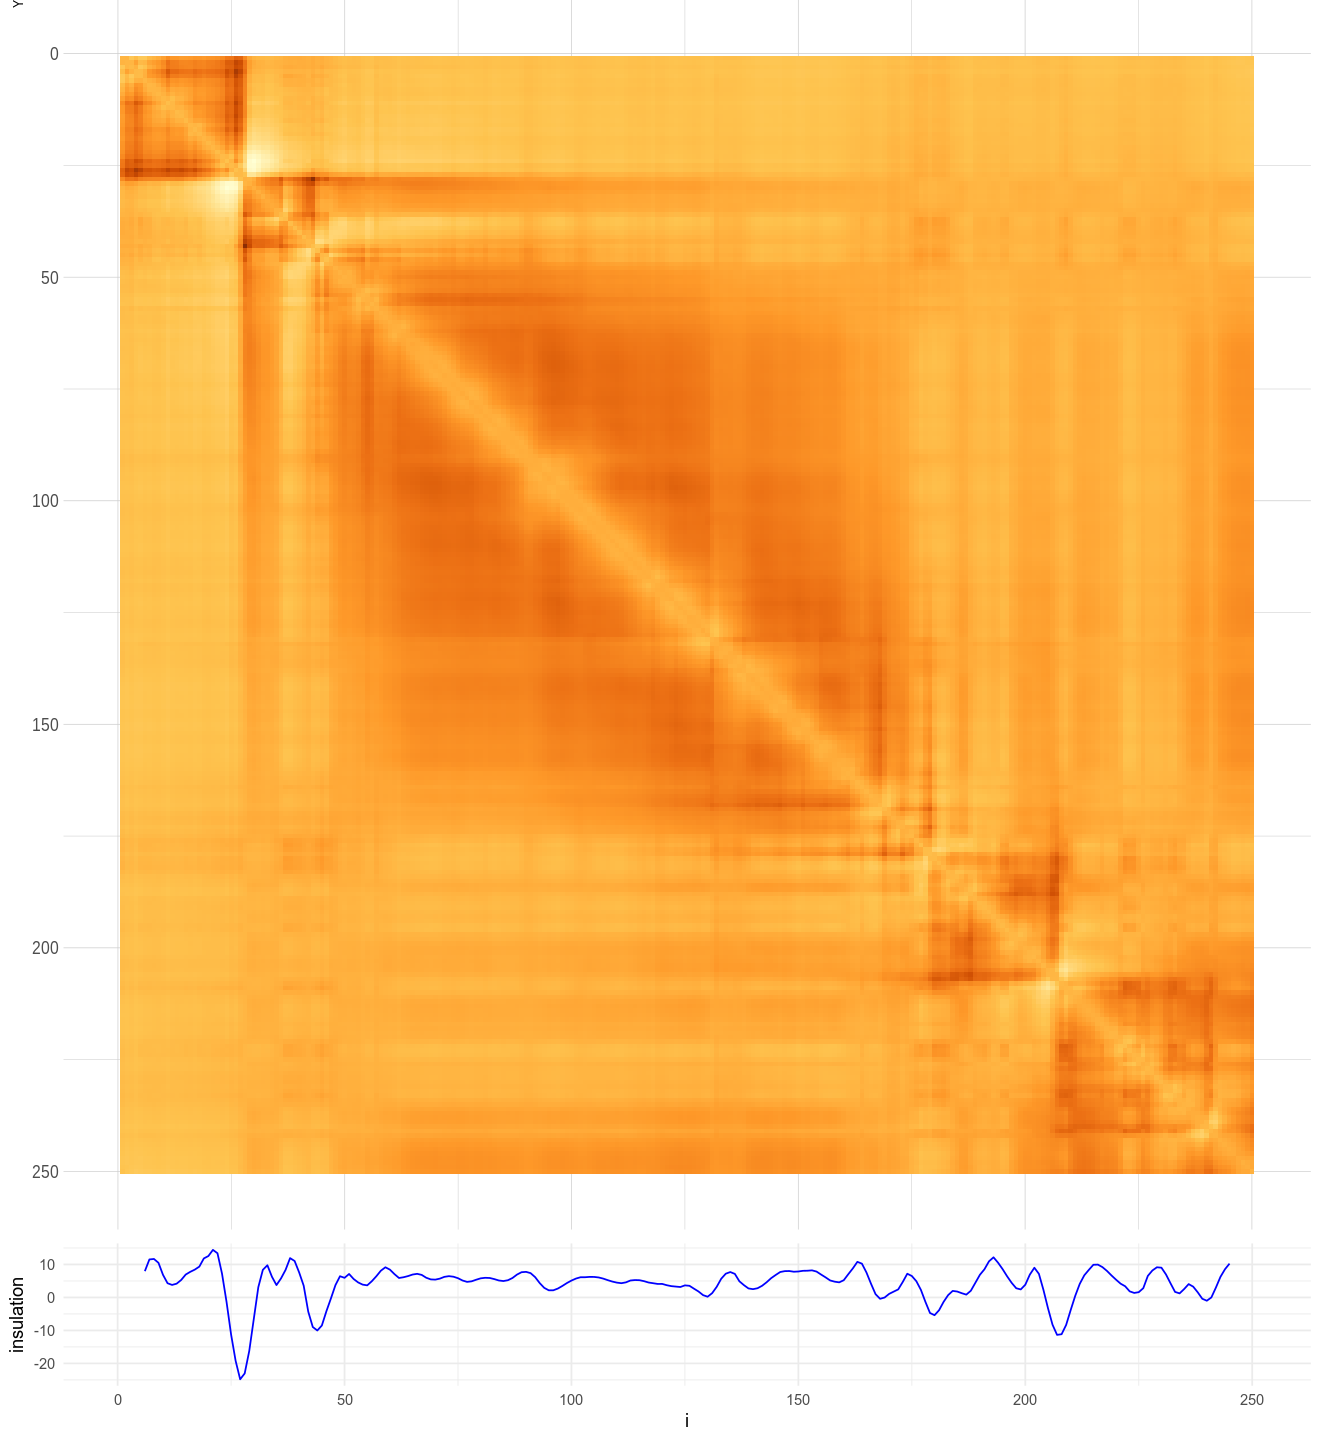

In [45]:
# Make plots wider 
#options(repr.plot.width=15, repr.plot.height=5)
options(repr.plot.width=11, repr.plot.height=12)
p1 = mat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() + 
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    theme_ipsum() +
    theme(legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))

p2 = data %>% ggplot(aes(x=i, y=insulation)) +
         geom_line(color="blue") +
         scale_x_continuous(expand = c(0.075, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

### Computing the PC1

In [20]:
cormat = cor(mat, method = "pearson")
eigen_result <- eigen(cormat)

eigenvalues <- eigen_result$values
eigenvectors <- eigen_result$vectors

PC1 = eigenvectors[,1]
compart = tibble(i = seq_along(PC1), pc1=PC1)

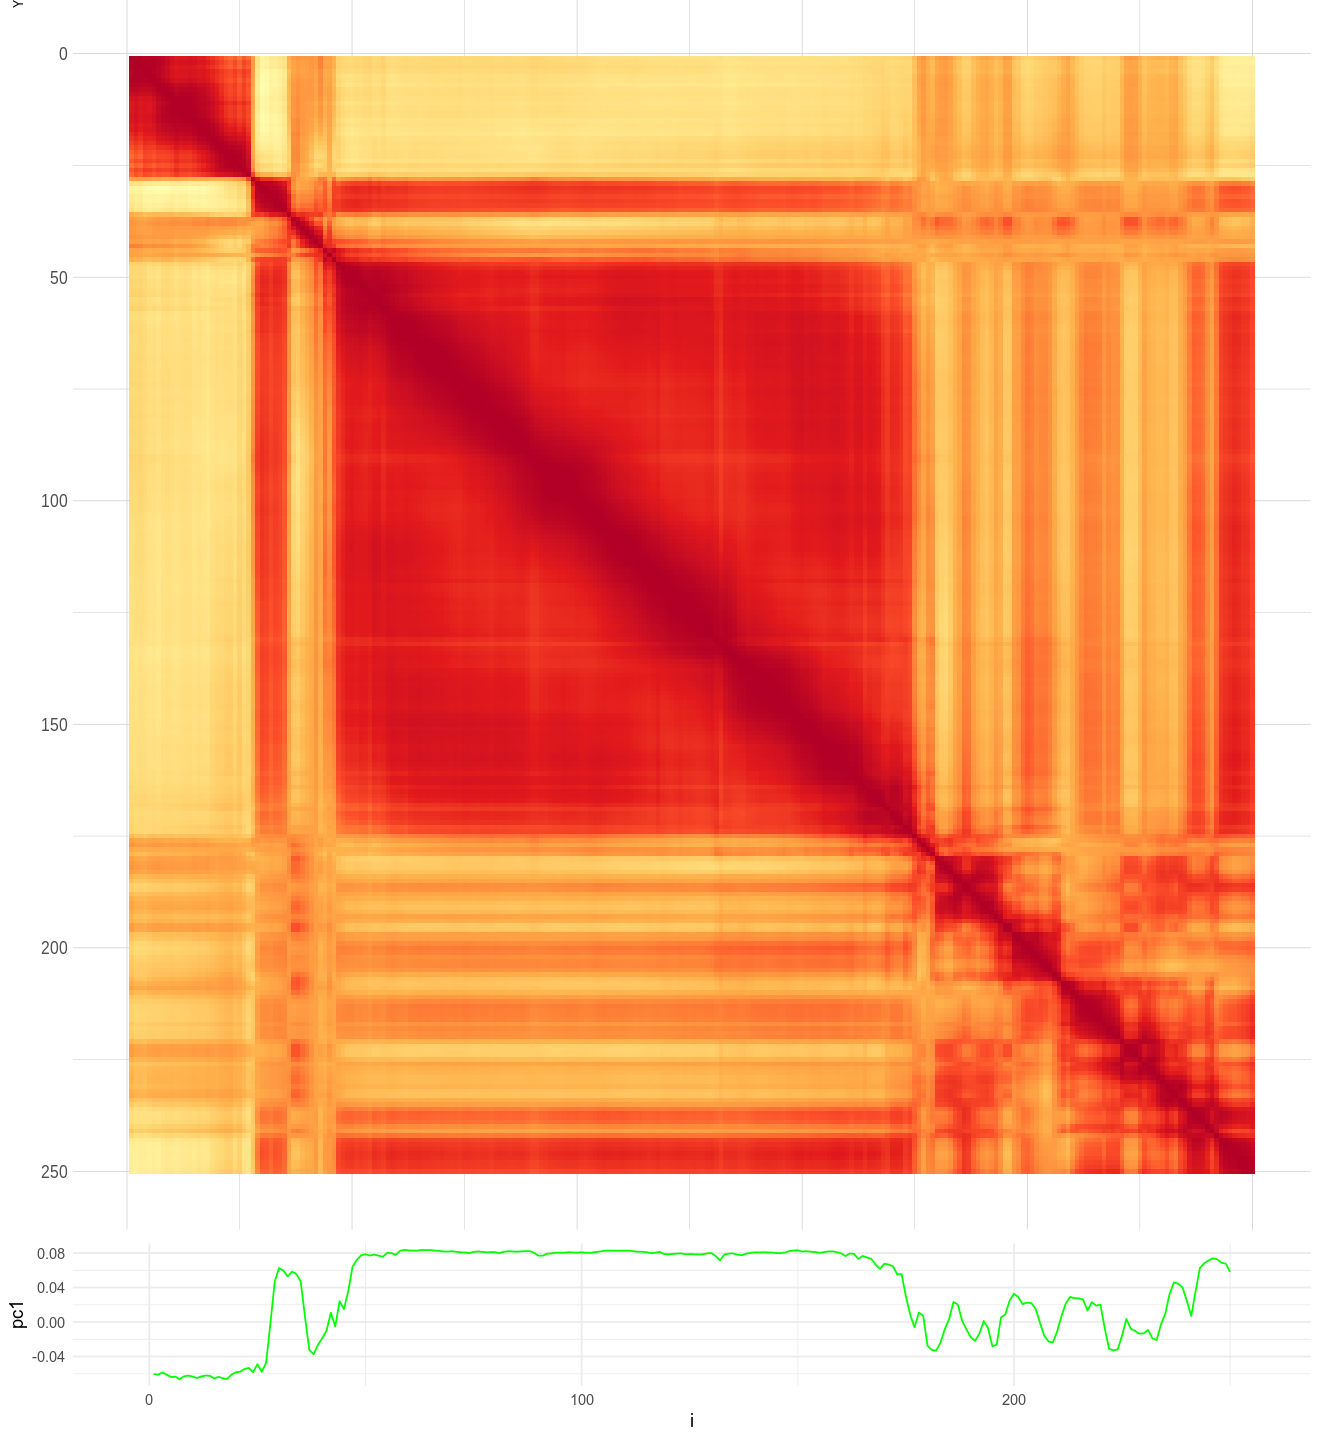

In [22]:
# Make plots wider 
#options(repr.plot.width=15, repr.plot.height=5)
options(repr.plot.width=11, repr.plot.height=12)
p1 = cormat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrRd", direction=1) +
    scale_y_reverse() +
    theme_ipsum() +
    theme(legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))

p2 = compart %>% ggplot(aes(x=i, y=pc1)) +
         geom_line(color="green") +
         scale_x_continuous(expand = c(0.075, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")